<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [1]:
from PIL import Image
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import scipy as sp
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow.keras as keras
import tensorflow as tf

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [2]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [3]:
dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

KeyboardInterrupt: 

**Kopieer de directory 2750 uit je de directory Downloads in pics.<br>
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore</strong>**

<h3>Exercise 1</h3>
<p>
    Voeg de directory Highway toe aan de <u>list</u> edgeFiles zodat ook de Highway images worden meegenomen. 
</p>

In [4]:
txtFiles = list()

In [5]:
hiDirectory = 'pics/2750/Highway'
 
for filename in os.listdir(hiDirectory):
    txtFile = os.path.join(hiDirectory, filename)
    txtFiles.append(txtFile)
    # print(txtFile)

In [6]:
riDirectory = 'pics/2750/River'
 
for filename in os.listdir(riDirectory):
    txtFile = os.path.join(riDirectory, filename)
    txtFiles.append(txtFile)
    # print(txtFile)

<h3>Data filteren</h3>

**Gebruik een <i>list comprehension</i> voor het filteren van data**

In [7]:
# edgeFiles = [img for img in edgeFiles if ".jpg" in img]
# print(type(imgFiles))
# print(edgeFiles[0])

In [8]:
txtFiles = [x for x in txtFiles if ".jpg" in x]


<h3>Data inlezen</h3>

In [9]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(txtFiles[i])).astype('uint8')/255
  i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [10]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[2]
    i += 1

print(label)    
print(txtFiles[0])    


pics/2750/River/River_2146.jpg
Highway


In [11]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
print(labelNames)
print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

['Highway' 'River']
[0 0 0 ... 1 1 1]


array([[   0, 2500],
       [   1, 2500]])

In [12]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)
print(nrOfImages)

(3750, 64, 64, 3)
3750


<h3>Data inspecteren</h3>

In [13]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

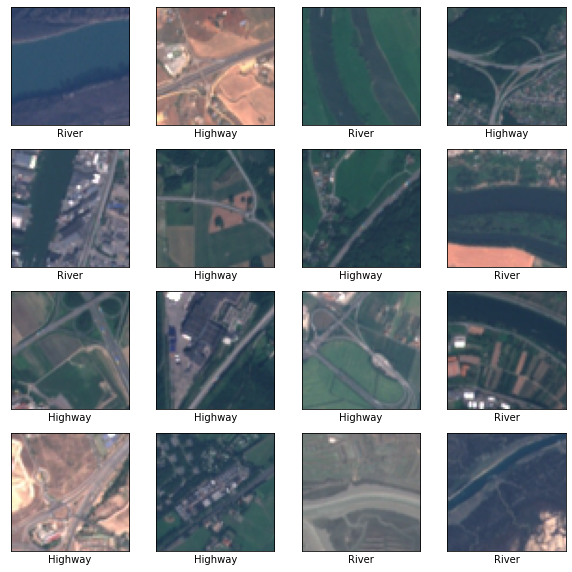

In [14]:
inspectData() 

<h3>Exercise 2</h3>
<p>
Pas de functie <u>inspectData()</u> aan zodat deze <u>random</u> images uit de dataset selecteert.
<strong>Let erop dat bij iedere image het corresponderende label getoond wordt</strong>
</p>

In [15]:
def inspectData():
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = (i+random.randrange(0, 3750))
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

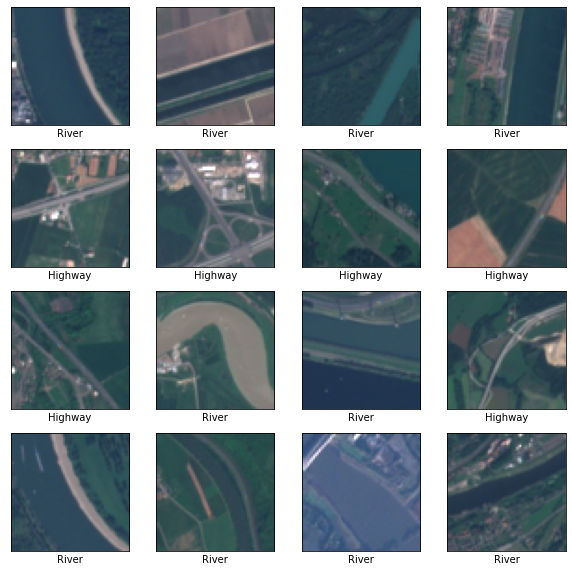

In [16]:
inspectData() 

<h3>Data voorbewerken</h3>

In [17]:
def RGB_convolve(inputImg, imgKernel):
    outputImg = np.empty_like(inputImg)

    for dim in range(inputImg.shape[-1]):  # loop over rgb channels
        outputImg[:, :, dim] = sp.signal.convolve2d(im_data[:, :, dim], imgKernel, mode="same", boundary="symm")

    return outputImg

In [18]:
def RGB2RGBA(arr, fill_value=1):
    """Add an alpha channel to an RGB array"""
    if arr.shape[-1] >= 4:
        return arr
    arr2 = np.full(shape=(*arr.shape[:-1], 4),
                   fill_value=fill_value,
                   dtype=arr.dtype)
    arr2[:, :, :-1] = arr/255.

    return arr2

In [19]:
def init_plot():
    return (imL, imR)

In [20]:
plt.style.use('dark_background') 
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 7)

In [ ]:
imgFile = "pics/Highway_12.jpg"
# imgFile = "~/Downloads/2750/Highway/Highway_12.jpg"
T = 10  # seconds
fps = 30
fTotal = T*fps  # total number of frames
imgKernels = {
                "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
             }

**Selecteer de Image Kernel voor Convolution**

In [ ]:
kernelName = "Sharpen 3x3"
kernel = imgKernels[kernelName]

In [ ]:
im_data = RGB2RGBA(plt.imread(imgFile).astype(float))
imgFiltered = RGB_convolve(imgData, kernel)
imgFiltered[:, :, -1] = 1
imgDisplay = np.copy(im_data)

In [ ]:
fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle("Sharpen 3x3")
imL = axL.imshow(np.clip(im_data, 0, 1) , interpolation="none")  # remove interpolation=...
imR = axR.imshow(np.clip(imgFiltered, 0, 1), interpolation="none")  # remove interpolation=...
axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
axL.axis('off'), axR.axis('off')

In [ ]:
# TOT HIER AFGEROND OPDRACHT 3 NOG MAKEN

<h3>Exercise 3</h3>
<p>
    Voeg een 3x3 imageKernel <u>horizontalEdgeDetection</u> toe aan <u>imgKernels</u> en voer daarmee een aantal Convoluties uit.<br> 
    Vergelijk de resultaten met die van de Convoluties met de Sharpen 3x3.<br>
    <strong>Tips</strong>: 
    <ul>
        <li>In de [sheets van de les Computer Vision](https://github.com/AlxcNL/MakeAIWork2/tree/main/lessen/week07/image_processing) kun je een voorbeeld van een verticale Edge Detection Filter vinden.</li>
        <li>Schrijf een functie voor <i>batchverwerking</i> op Images.</li>
    </ul>
</p>